In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.getcwd()
os.chdir('drive')
os.chdir('My Drive')
os.chdir('JanataHack5 - Mobility Analytics')
os.listdir()

['test.csv',
 'train.csv',
 'submissionlogic.csv',
 'submissionrfc.csv',
 '.ipynb_checkpoints',
 'catboost_info',
 'submissionxgb.csv',
 'sample_submission.csv',
 'Surge_Pricing_Type',
 'submissioncat.csv',
 'submissionav.csv',
 'Untitled.ipynb']

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv('train.csv')
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [6]:
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [0]:
df['Type_of_Cab'].value_counts()

B    31136
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

In [0]:
df['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [0]:
df['Customer_Rating'].value_counts()

2.75000    122
3.50000    120
3.35000    116
2.60000    112
3.20000    109
          ... 
4.94875      1
0.14500      1
0.12375      1
0.60500      1
0.03125      1
Name: Customer_Rating, Length: 3931, dtype: int64

In [0]:
temp = df.dropna()

In [9]:
temp.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [0]:
appendvr2testdf = pd.get_dummies(temp['Type_of_Cab'],drop_first=True)
temp = pd.concat([temp.drop('Type_of_Cab',axis=1),appendvr2testdf], axis=1)

temp.head()

In [0]:
appendvr2testdf = pd.get_dummies(temp['Confidence_Life_Style_Index'],drop_first=True)
temp = pd.concat([temp.drop('Confidence_Life_Style_Index',axis=1),appendvr2testdf], axis=1)
appendvr2testdf = pd.get_dummies(temp['Destination_Type'],drop_first=True)
temp = pd.concat([temp.drop('Destination_Type',axis=1),appendvr2testdf], axis=1)
appendvr2testdf = pd.get_dummies(temp['Gender'],drop_first=True)
temp = pd.concat([temp.drop('Gender',axis=1),appendvr2testdf], axis=1)
temp.head()

In [0]:
temp.corr()['Life_Style_Index']

In [10]:
X = temp[['Trip_Distance','Customer_Rating','Var2','Var3']]
y= temp['Life_Style_Index']

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
def lsi_miss(Var2,Var3,Trip_Distance,Customer_Rating,Life_Style_Index):
    if np.isnan(Life_Style_Index)==False:
        return Life_Style_Index
    else:
        X = np.array([Var2, Var3,Trip_Distance,Customer_Rating])
        X = X.reshape(1, -1)
        res = lr.predict(X)
        #print(res[0])
        return float(res[0])

In [12]:
df['Life_Style_Index'] = df.apply(lambda x : lsi_miss(x['Var2'], x['Var3'] , x['Trip_Distance'] , x['Customer_Rating'],x['Life_Style_Index']), axis= 1)
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index                   0
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [0]:
(df['Life_Style_Index'][69])

7.408643553015135

In [13]:
tempdf = df.dropna()
tempdf.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.9050,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.4500,0,38.0,56,78,Male,2
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.4025,4,51.0,49,102,Male,2
6,T0005689470,29.72,E,10.0,2.83958,C,B,2.9750,1,83.0,50,75,Male,2
7,T0005689472,18.44,B,2.0,2.81871,B,A,3.5825,0,103.0,46,63,Male,2


In [0]:
df['Customer_Since_Months'].value_counts()

10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64

In [0]:
df['Customer_Since_Months'].fillna(10.0,inplace=True)

In [15]:
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months              0
Life_Style_Index                   0
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [0]:
#df = df.drop('Var1',axis=1)
df['Var1'] = df['Var1'].fillna(df['Var1'].mean())

In [17]:
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months              0
Life_Style_Index                   0
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                               0
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [0]:
df.groupby('Type_of_Cab').mean()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Type_of_Cab,,,,,,,,,
A,43.847848,6.114933,3.628154,3.018303,0.664287,64.472723,51.319579,75.907089,1.512217
B,41.627295,6.157310,3.572385,2.905285,0.673497,64.290028,51.132580,75.040885,1.918037
C,43.635090,6.228362,3.562505,2.789632,0.834934,64.037559,51.149314,74.824728,2.311429
D,46.139080,6.250066,3.563874,2.726617,0.919383,63.873113,51.250540,74.784793,2.755621
E,49.996106,6.241362,3.557019,2.735295,0.946536,63.928825,51.236290,74.991405,2.628846


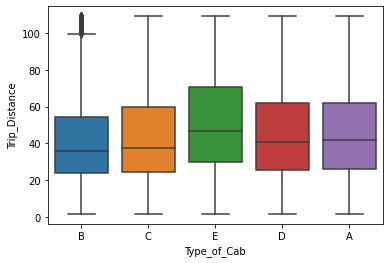

In [0]:
sns.boxplot(x=tempdf['Type_of_Cab'],y=tempdf['Trip_Distance'])

In [0]:
X = tempdf[['Trip_Distance','Customer_Rating','Life_Style_Index','Cancellation_Last_1Month','Customer_Since_Months']]
y = tempdf['Type_of_Cab']

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)

In [20]:
X[2]

array([0.42107327, 0.5396525 , 0.92361702, 3.00241118, 1.04510909])

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
def toc_miss(Trip_Distance,Customer_Rating,Life_Style_Index,Cancellation_Last_1Month,Customer_Since_Months,Type_of_Cab):
    if pd.isnull(Type_of_Cab) == False:
        return str(Type_of_Cab)
    else:
        res = logreg.predict([[Trip_Distance,Customer_Rating,Life_Style_Index,Cancellation_Last_1Month,Customer_Since_Months]])
        #print(res[0])
        return res[0]

In [23]:
scaled_features = df.copy()
col_names = ['Trip_Distance','Customer_Rating','Life_Style_Index','Cancellation_Last_1Month','Customer_Since_Months']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
scaled_features.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,-1.466568,B,-1.427705,-0.616808,A,A,1.076346,-0.754502,40.000000,46,60,Female,2
1,T0005689461,-0.577167,B,1.045336,-0.426190,B,A,0.612378,-0.754502,38.000000,56,78,Male,2
2,T0005689464,-0.102689,NaN,1.045336,2.382870,NaN,E,0.664638,1.173106,64.202698,56,77,Male,2
3,T0005689465,0.680141,C,1.045336,2.280343,NaN,A,0.616202,-0.754502,64.202698,52,74,Male,3
4,T0005689467,0.421157,C,1.045336,-0.290744,B,A,0.563942,3.100714,51.000000,49,102,Male,2


In [24]:
df['Type_of_Cab'] = scaled_features.apply(lambda x : toc_miss(x['Trip_Distance'], x['Customer_Rating'] , x['Life_Style_Index'],x['Cancellation_Last_1Month'], x['Customer_Since_Months'],x['Type_of_Cab']), axis= 1)
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months              0
Life_Style_Index                   0
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                               0
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [0]:
df['Type_of_Cab'].value_counts()

# B    31136
# C    28122
# A    21569
# D    18991
# E    11634

B    42707
C    35850
A    21603
D    19789
E    11713
Name: Type_of_Cab, dtype: int64

In [0]:
df = df.drop('Confidence_Life_Style_Index',axis = 1)

In [0]:
screal = StandardScaler()

In [0]:
testdf = pd.read_csv('test.csv')

In [26]:
testdf['Life_Style_Index'] = testdf.apply(lambda x : lsi_miss(x['Var2'], x['Var3'] , x['Trip_Distance'] , x['Customer_Rating'],x['Life_Style_Index']), axis= 1)
testdf.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index                   0
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [27]:
scaled_features_test = testdf.copy()
col_names = ['Trip_Distance','Customer_Rating','Life_Style_Index','Cancellation_Last_1Month','Customer_Since_Months']
features_test = scaled_features_test[col_names]
features_test = scaler.transform(features_test.values)

scaled_features_test[col_names] = features_test
scaled_features_test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,-1.361956,A,1.045336,-0.537989,A,B,0.846912,1.173106,NaN,46,63,Male
1,T0005689462,-0.472163,B,1.045336,-0.389126,A,A,-1.280457,-0.754502,65.0,49,80,Female
2,T0005689463,-1.325126,C,-0.603358,-0.467644,A,D,1.688172,-0.754502,NaN,47,74,Male
3,T0005689466,-1.146462,NaN,-0.053793,-0.587847,C,E,1.713664,-0.754502,63.0,43,54,Male
4,T0005689468,-0.476864,B,0.220989,-0.408174,A,K,1.786319,2.136910,96.0,44,56,Male


In [28]:
scaled_features_test['Customer_Since_Months'].value_counts()

 1.045336    28137
-1.152922     7824
-0.878140     6723
-1.702487     6716
-0.328575     5764
-1.427705     5668
-0.603358     5309
 0.220989     4925
-0.053793     4904
 0.495771     4197
 0.770554     3262
Name: Customer_Since_Months, dtype: int64

In [0]:
scaled_features_test['Customer_Since_Months'].fillna(1.045336,inplace=True)

In [30]:
testdf['Type_of_Cab'] = scaled_features_test.apply(lambda x : toc_miss(x['Trip_Distance'], x['Customer_Rating'] , x['Life_Style_Index'],x['Cancellation_Last_1Month'], x['Customer_Since_Months'],x['Type_of_Cab']), axis= 1)
testdf.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months           3966
Life_Style_Index                   0
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [0]:
testdf['Customer_Since_Months'].fillna(10.0,inplace=True)

In [0]:
testdf['Var1'] = testdf['Var1'].fillna(testdf['Var1'].mean())

In [33]:
testdf.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months              0
Life_Style_Index                   0
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                               0
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [0]:
testdf = testdf.drop('Confidence_Life_Style_Index',axis=1)

In [0]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Trip_ID                   87395 non-null  object 
 1   Trip_Distance             87395 non-null  float64
 2   Type_of_Cab               87395 non-null  object 
 3   Customer_Since_Months     87395 non-null  float64
 4   Life_Style_Index          87395 non-null  float64
 5   Destination_Type          87395 non-null  object 
 6   Customer_Rating           87395 non-null  float64
 7   Cancellation_Last_1Month  87395 non-null  int64  
 8   Var1                      87395 non-null  float64
 9   Var2                      87395 non-null  int64  
 10  Var3                      87395 non-null  int64  
 11  Gender                    87395 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 8.0+ MB


In [0]:
combinedf = pd.concat([df,testdf],axis=0)
combinedf.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.427690,A,3.90500,0,40.000000,46,60,Female,2.0
1,T0005689461,29.47,B,10.0,2.782450,A,3.45000,0,38.000000,56,78,Male,2.0
2,T0005689464,41.58,B,10.0,8.010407,E,3.50125,2,64.202698,56,77,Male,2.0
3,T0005689465,61.56,C,10.0,7.819595,A,3.45375,0,64.202698,52,74,Male,3.0
4,T0005689467,54.95,C,10.0,3.034530,A,3.40250,4,51.000000,49,102,Male,2.0


In [0]:
#131662 + 87395 = 219057

combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Trip_ID                   219057 non-null  object 
 1   Trip_Distance             219057 non-null  float64
 2   Type_of_Cab               219057 non-null  object 
 3   Customer_Since_Months     219057 non-null  float64
 4   Life_Style_Index          219057 non-null  float64
 5   Destination_Type          219057 non-null  object 
 6   Customer_Rating           219057 non-null  float64
 7   Cancellation_Last_1Month  219057 non-null  int64  
 8   Var1                      219057 non-null  float64
 9   Var2                      219057 non-null  int64  
 10  Var3                      219057 non-null  int64  
 11  Gender                    219057 non-null  object 
 12  Surge_Pricing_Type        131662 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usa

In [0]:
scaled_features_combined = combinedf.copy()
col_names = ['Trip_Distance','Customer_Rating','Life_Style_Index','Cancellation_Last_1Month','Customer_Since_Months','Var1','Var2','Var3']
features_combine = scaled_features_combined[col_names]
features_combine = screal.fit_transform(features_combine.values)

scaled_features_combined[col_names] = features_combine
scaled_features_combined.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,-1.465804,B,-1.424890,-0.616467,A,1.076720,-0.755533,-1.629876,-1.042638,-1.301007,Female,2.0
1,T0005689461,-0.575863,B,1.047783,-0.425869,A,0.612954,-0.755533,-1.765154,0.967620,0.253385,Male,2.0
2,T0005689464,-0.101097,B,1.047783,2.382891,E,0.665191,1.174518,0.007180,0.967620,0.167030,Male,2.0
3,T0005689465,0.682207,C,1.047783,2.280375,A,0.616776,-0.755533,0.007180,0.163517,-0.092035,Male,3.0
4,T0005689467,0.423066,C,1.047783,-0.290437,A,0.564539,3.104570,-0.885842,-0.439560,2.325909,Male,2.0


In [0]:
scaled_features_combined.isnull().sum()

Trip_ID                         0
Trip_Distance                   0
Type_of_Cab                     0
Customer_Since_Months           0
Life_Style_Index                0
Destination_Type                0
Customer_Rating                 0
Cancellation_Last_1Month        0
Var1                            0
Var2                            0
Var3                            0
Gender                          0
Surge_Pricing_Type          87395
dtype: int64

In [0]:
appenddf = pd.get_dummies(scaled_features_combined['Type_of_Cab'],drop_first=True)
scaled_features_combined = pd.concat([scaled_features_combined.drop('Type_of_Cab',axis=1),appenddf], axis=1)
appenddf = pd.get_dummies(scaled_features_combined['Destination_Type'],drop_first=True)
scaled_features_combined = pd.concat([scaled_features_combined.drop('Destination_Type',axis=1),appenddf], axis=1)
appenddf = pd.get_dummies(scaled_features_combined['Gender'],drop_first=True)
scaled_features_combined = pd.concat([scaled_features_combined.drop('Gender',axis=1),appenddf], axis=1)
scaled_features_combined.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,B,C,D,E,B,C,D,E,F,G,H,I,J,K,L,M,N,Male
0,T0005689460,-1.465804,-1.424890,-0.616467,1.076720,-0.755533,-1.629876,-1.042638,-1.301007,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,T0005689461,-0.575863,1.047783,-0.425869,0.612954,-0.755533,-1.765154,0.967620,0.253385,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,T0005689464,-0.101097,1.047783,2.382891,0.665191,1.174518,0.007180,0.967620,0.167030,2.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,T0005689465,0.682207,1.047783,2.280375,0.616776,-0.755533,0.007180,0.163517,-0.092035,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,T0005689467,0.423066,1.047783,-0.290437,0.564539,3.104570,-0.885842,-0.439560,2.325909,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:

scaled_features_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Trip_ID                   219057 non-null  object 
 1   Trip_Distance             219057 non-null  float64
 2   Customer_Since_Months     219057 non-null  float64
 3   Life_Style_Index          219057 non-null  float64
 4   Customer_Rating           219057 non-null  float64
 5   Cancellation_Last_1Month  219057 non-null  float64
 6   Var1                      219057 non-null  float64
 7   Var2                      219057 non-null  float64
 8   Var3                      219057 non-null  float64
 9   Surge_Pricing_Type        131662 non-null  float64
 10  B                         219057 non-null  uint8  
 11  C                         219057 non-null  uint8  
 12  D                         219057 non-null  uint8  
 13  E                         219057 non-null  ui

In [0]:
traindf = scaled_features_combined.iloc[:131662]
testdf = scaled_features_combined.iloc[131662:]

In [0]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87395 entries, 0 to 87394
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Trip_ID                   87395 non-null  object 
 1   Trip_Distance             87395 non-null  float64
 2   Customer_Since_Months     87395 non-null  float64
 3   Life_Style_Index          87395 non-null  float64
 4   Customer_Rating           87395 non-null  float64
 5   Cancellation_Last_1Month  87395 non-null  float64
 6   Var1                      87395 non-null  float64
 7   Var2                      87395 non-null  float64
 8   Var3                      87395 non-null  float64
 9   Surge_Pricing_Type        0 non-null      float64
 10  B                         87395 non-null  uint8  
 11  C                         87395 non-null  uint8  
 12  D                         87395 non-null  uint8  
 13  E                         87395 non-null  uint8  
 14  B     

In [0]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131662 entries, 0 to 131661
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Trip_ID                   131662 non-null  object 
 1   Trip_Distance             131662 non-null  float64
 2   Customer_Since_Months     131662 non-null  float64
 3   Life_Style_Index          131662 non-null  float64
 4   Customer_Rating           131662 non-null  float64
 5   Cancellation_Last_1Month  131662 non-null  float64
 6   Var1                      131662 non-null  float64
 7   Var2                      131662 non-null  float64
 8   Var3                      131662 non-null  float64
 9   Surge_Pricing_Type        131662 non-null  float64
 10  B                         131662 non-null  uint8  
 11  C                         131662 non-null  uint8  
 12  D                         131662 non-null  uint8  
 13  E                         131662 non-null  u

# Models

In [0]:
traindf.columns

Index(['Trip_ID', 'Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type', 'B', 'C', 'D', 'E', 'B', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Male'],
      dtype='object')

In [0]:
X_train = traindf[['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
        'B', 'C', 'D', 'E', 'B', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Male']]
y_train = traindf['Surge_Pricing_Type']

In [0]:
logicreg = LogisticRegression()

logicreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
X_test = testdf[['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
        'B', 'C', 'D', 'E', 'B', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Male']]
predictions = logicreg.predict(X_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions = rfc.predict(X_test)

In [0]:
df.coloumns

In [0]:
X_train = traindf[['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'B1', 'C1', 'D1', 'E1', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2',
       'H2', 'I2', 'J2', 'K2', 'L2', 'M2', 'N2', 'Male']]
y_train = traindf['Surge_Pricing_Type']

X_test = testdf[['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'B1', 'C1', 'D1', 'E1', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2',
       'H2', 'I2', 'J2', 'K2', 'L2', 'M2', 'N2', 'Male']]

In [0]:
X_test.isnull().sum()

Trip_Distance               0
Customer_Since_Months       0
Life_Style_Index            0
Customer_Rating             0
Cancellation_Last_1Month    0
Var1                        0
Var2                        0
Var3                        0
B1                          0
C1                          0
D1                          0
E1                          0
B2                          0
C2                          0
D2                          0
E2                          0
F2                          0
G2                          0
H2                          0
I2                          0
J2                          0
K2                          0
L2                          0
M2                          0
N2                          0
Male                        0
dtype: int64

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42, n_jobs = -1,n_estimators=500)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
predictions = xgb.predict(X_test)

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [1,3,5], 
             'min_child_weight': [1,3,5], 
             'n_estimators': [100,200,500,1000], 
             'scale_pos_weight': [1, 0.1, 0.01]}

In [0]:
CV_GBM = GridSearchCV(estimator = xgb, 
                      param_grid = param_grid, 
                      cv = 3, 
                      n_jobs = -1,
                      refit = True)
CV_GBM.fit(X_train, y_train)
CV_GBM.best_params_

KeyboardInterrupt: ignored

In [118]:
X_train.shape
#y_train.shape

(131662, 26)

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(26, activation='relu',input_shape = X_train.shape[1]))

# The Hidden Layers :
NN_model.add(Dense(26,activation='relu'))
NN_model.add(Dense(26,activation='relu'))
NN_model.add(Dense(26,activation='relu'))


# The Output Layer :
NN_model.add(Dense(3, activation='softmax'))

# Compile the network :
NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model.summary()

import tensorflow as tf

es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience =10, mode='min')

NN_model.fit(X_train, y_train, epochs=500, validation_split = 0.2, callbacks=[es],batch_size=None)

#scores = NN_model.predict(X_test)

predictions = NN_model.predict_classes(X_test)

TypeError: ignored

In [129]:
!pip3 install catboost
from catboost import CatBoostClassifier

model = CatBoostClassifier(n_estimators=200)
model.fit(X_train,y_train,verbose=True)

predictions = model.predict(X_test)

Learning rate set to 0.395408
0:	learn: 0.9045067	total: 84ms	remaining: 16.7s
1:	learn: 0.8341751	total: 182ms	remaining: 18.1s
2:	learn: 0.8024506	total: 261ms	remaining: 17.2s
3:	learn: 0.7865259	total: 338ms	remaining: 16.6s
4:	learn: 0.7750913	total: 420ms	remaining: 16.4s
5:	learn: 0.7675345	total: 502ms	remaining: 16.2s
6:	learn: 0.7607781	total: 582ms	remaining: 16.1s
7:	learn: 0.7562606	total: 659ms	remaining: 15.8s
8:	learn: 0.7529336	total: 734ms	remaining: 15.6s
9:	learn: 0.7494037	total: 819ms	remaining: 15.6s
10:	learn: 0.7472702	total: 909ms	remaining: 15.6s
11:	learn: 0.7446420	total: 993ms	remaining: 15.6s
12:	learn: 0.7428778	total: 1.07s	remaining: 15.3s
13:	learn: 0.7409351	total: 1.15s	remaining: 15.3s
14:	learn: 0.7394590	total: 1.23s	remaining: 15.2s
15:	learn: 0.7379235	total: 1.31s	remaining: 15s
16:	learn: 0.7371373	total: 1.39s	remaining: 15s
17:	learn: 0.7362343	total: 1.47s	remaining: 14.9s
18:	learn: 0.7352021	total: 1.55s	remaining: 14.7s
19:	learn: 0.733

In [0]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [35]:
!pip install autoviml --upgrade

     |████████████████████████████████| 102kB 5.6MB/s 
     |████████████████████████████████| 64.7MB 62kB/s 
     |████████████████████████████████| 133kB 45.5MB/s 


In [36]:
from autoviml.Auto_ViML import Auto_ViML

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Imported Auto_NLP version: 0.0.35.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced-accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)
Imported Auto_ViML version: 0.1.627. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            
To remove previous versions, perform 'pip uninstall autoviml'
To get the latest version, perform "pip install autoviml --no-cache-dir --ignore-installed"


In [0]:
samplesub = pd.read_csv('sample_submission.csv')
newtrain1 = df
newtest1 = testdf
#newtrain1.drop('Trip_ID',axis=1,inplace=True)
#newtest1.drop('Trip_ID',axis=1,inplace=True)

In [50]:
newtest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_Distance                87395 non-null  float64
 1   Type_of_Cab                  87395 non-null  object 
 2   Customer_Since_Months        87395 non-null  float64
 3   Life_Style_Index             87395 non-null  float64
 4   Confidence_Life_Style_Index  74068 non-null  object 
 5   Destination_Type             87395 non-null  object 
 6   Customer_Rating              87395 non-null  float64
 7   Cancellation_Last_1Month     87395 non-null  int64  
 8   Var1                         87395 non-null  float64
 9   Var2                         87395 non-null  int64  
 10  Var3                         87395 non-null  int64  
 11  Gender                       87395 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 8.0+ MB


##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (131662, 13)
    Training Set Memory Usage = 13.06 MB
Test Set Shape = (87395, 12)
    Test Set Memory Usage = 8.00 MB
Single_Label Target: ['Surge_Pricing_Type']
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
Shuffling the data set before training
 Class  -> Counts -> Percent
     2:   56728  ->   43.1%
     3:   47720  ->   36.2%
     1:   27214  ->   20.7%
Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
CAUTION: In Multi-Class Boosting (2+ classes), TRAINING WILL TAKE A LOT OF TIME!
String or Multi Class target: Surge_Pricing_Type transformed as follows: {2: 0, 3: 1, 1: 2}
Alert! Rare Class is not 1 but 2 in this data set
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.064087
0:	test: 0.8203268	best: 0.8203268 (0)	total: 95ms	remaining: 7m 55s


100:	test: 0.8628413	best: 0.8628413 (100)	total: 5.16s	remaining: 4m 10s
200:	test: 0.8660644	best: 0.8660644 (200)	total: 10.1s	remaining: 4m
300:	test: 0.8676328	best: 0.8676328 (300)	total: 14.8s	remaining: 3m 51s
400:	test: 0.8682710	best: 0.8682710 (400)	total: 19.7s	remaining: 3m 45s
500:	test: 0.8687822	best: 0.8687902 (499)	total: 24.5s	remaining: 3m 40s
600:	test: 0.8688916	best: 0.8689132 (588)	total: 29.3s	remaining: 3m 34s
700:	test: 0.8689960	best: 0.8690126 (695)	total: 34.1s	remaining: 3m 28s
800:	test: 0.8691086	best: 0.8691088 (795)	total: 38.9s	remaining: 3m 23s
900:	test: 0.8692059	best: 0.8692059 (900)	total: 43.7s	remaining: 3m 18s
1000:	test: 0.8692068	best: 0.8692427 (932)	total: 48.5s	remaining: 3m 13s
1100:	test: 0.8691348	best: 0.8692427 (932)	total: 53.2s	remaining: 3m 8s
Stopped by overfitting detector  (250 iterations wait)

bestTest = 0.8692427247
bestIteration = 932

Shrink model to first 933 iterations.
    Actual training time (in seconds): 58
########

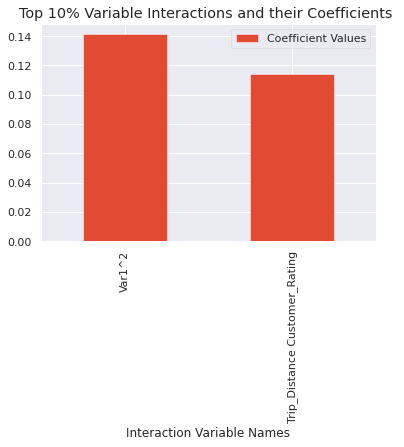

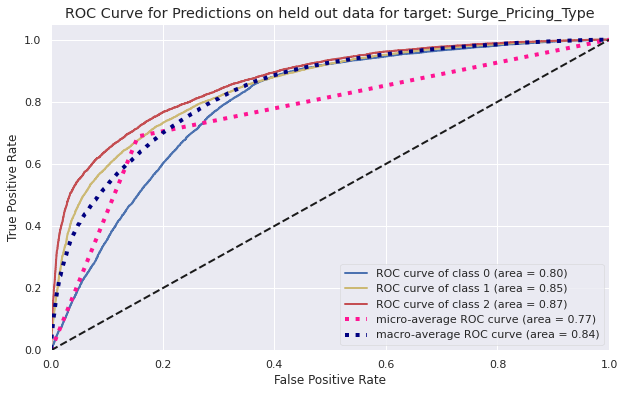

Average precision score, micro-averaged over all classes: 0.75
Macro F1 score, averaged over all classes: 0.68


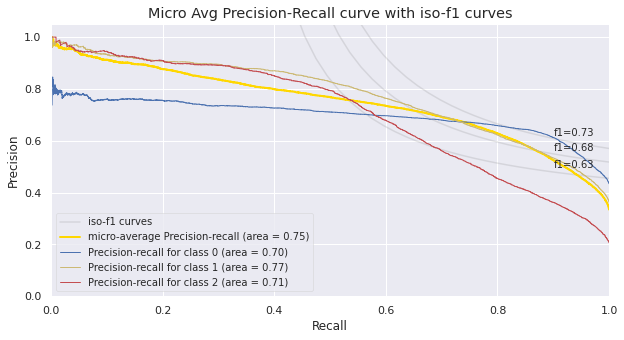

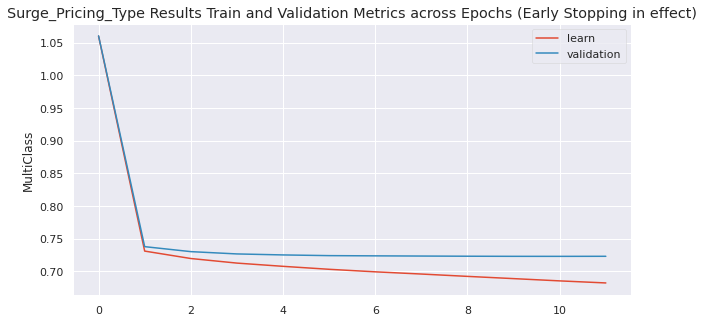

    Time taken for this Target (in seconds) = 926
Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T  #################
    Time taken for this Target (in seconds) = 926
Training model on complete Train data and Predicting using give Test Data...
Entropy Binning 2 continuous variables...
    Binning and replacing 2 numeric features.
    Adding one Feature named "KMeans_Clusters" using KMeans_Featurizer...
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Time taken for Stacking: 2.0 seconds
    Adding 3 Stacking feature(s) to training data
    Time taken for Stacking: 0.3 seconds
Learning rate set to 0.026049
0:	total: 69.2ms	remaining: 5m 46s
100:	total: 5.81s	remaining: 4m 41s
200:	total: 11.4s	remaining: 4m 33s
300:	total: 17.1s	remaining: 4m 26s
400:	total: 22.6s	remaining: 4m 19s
500:	total: 28.1s	remaining: 4m 12s
600:	total: 33.5s	remaining: 4m 5s
700:	total: 38.9s	remaining: 3m 58s
800:	total: 

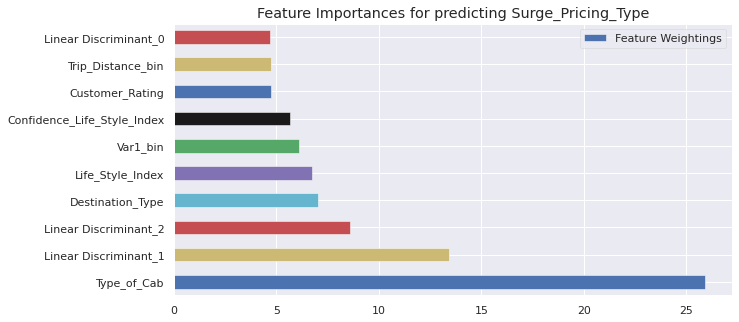

In [61]:
m, feats, trainm, testm = Auto_ViML(newtrain1, 'Surge_Pricing_Type', newtest1,
                            sample_submission = samplesub,
                            scoring_parameter='', KMeans_Featurizer=True,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=True,
                            Add_Poly=3, Stacking_Flag=True,
                            verbose=1)

In [52]:
testm.head(1)

,Type_of_Cab,Confidence_Life_Style_Index,Cancellation_Last_1Month,Destination_Type,Customer_Rating,Var3,Life_Style_Index,Var2,Confidence_Life_Style_Index_Missing_Flag,Customer_Since_Months,Gender,Trip_Distance_bin,Var1_bin,KMeans_Clusters,Partial_Input_Linear Discriminant_0,Partial_Input_Linear Discriminant_1,Partial_Input_Linear Discriminant_2,Surge_Pricing_Type_predictions,Surge_Pricing_Type_proba_2,Surge_Pricing_Type_proba_3,Surge_Pricing_Type_proba_1,Surge_Pricing_Type_Stacked_Linear Discriminant_predictions
0,0,0,2,1,0.74,63,0.09,46,0,1.00,1,0,2,1,0.52,0.08,0.41,1,0.23,0.22,0.55,1


In [0]:
predictions = testm[['Surge_Pricing_Type_predictions']]

In [0]:
predictions.columns = ['Surge_Pricing_Type']

In [55]:
predictions.head()

,Surge_Pricing_Type
0,1
1,2
2,2
3,2
4,2


In [0]:
ans = pd.DataFrame(predictions,columns=['Surge_Pricing_Type'])

ans = pd.concat([ans,samplesub['Trip_ID']],axis=1)

ans.to_csv('submissionav2.csv',index=False)

In [59]:
ans['Surge_Pricing_Type'].value_counts()

2    45830
3    30908
1    10657
Name: Surge_Pricing_Type, dtype: int64

In [60]:
ans

,Surge_Pricing_Type,Trip_ID
0,1,T0005689459
1,2,T0005689462
2,2,T0005689463
3,2,T0005689466
4,2,T0005689468
...,...,...
87390,2,T0005908503
87391,2,T0005908504
87392,1,T0005908505
87393,2,T0005908511
